# 2013-2016 growth words
In which we look for words that increased significantly in frequency between 2013 and 2016.

In [1]:
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

## Load data

In [43]:
tf_2013_2016 = pd.read_csv('../../data/frequency/2013_2016_tf_norm.tsv', sep='\t', index_col=0)

In [44]:
top_k = 200000
top_200000_2013_2016 = tf_2013_2016.mean(axis=1).sort_values(inplace=False, ascending=False)[:top_k]

In [45]:
print(top_200000_2013_2016)

the               4.184490e-02
to                2.786731e-02
a                 2.634709e-02
i                 2.482744e-02
and               2.269235e-02
of                1.797497e-02
you               1.632671e-02
it                1.542783e-02
that              1.481701e-02
is                1.468691e-02
in                1.344084e-02
for               1.046617e-02
on                7.684332e-03
but               7.647538e-03
have              7.340700e-03
this              7.240956e-03
with              7.177877e-03
be                7.175227e-03
not               6.760560e-03
was               6.486435e-03
are               6.471455e-03
my                6.192598e-03
if                6.052707e-03
as                5.673692e-03
they              5.557698e-03
just              5.385549e-03
so                5.058373e-03
like              5.051820e-03
or                4.754626e-03
your              4.664057e-03
                      ...     
hempcoin          2.015306e-08
rudys   

In [10]:
spearman_test = spearmanr(X, tf_2013_2016.loc['test'])
print(pd.Series(spearman_test, index=['correl', 'pvalue']))

correl    8.414634e-01
pvalue    5.591475e-12
dtype: float64


In [46]:
# get correls
X = range(tf_2013_2016.shape[1])
vocab = top_200000_2013_2016.index
correls_2013_2016 = tf_2013_2016.ix[vocab, :].apply(lambda y: pd.Series(spearmanr(X, y), index=['correl', 'pvalue']), axis=1)

In [47]:
correls_2013_2016.sort_values('correl', inplace=True, ascending=False)
print(correls_2013_2016)

                  correl        pvalue
tho             0.999303  2.584840e-57
tbh             0.999129  2.002225e-55
idk             0.996690  3.962452e-44
smh             0.995993  1.634159e-42
tbf             0.995819  3.741569e-42
jfc             0.994425  1.009303e-39
nah             0.993902  5.766618e-39
impactful       0.993728  9.972992e-39
shitpost        0.993031  7.734382e-38
literally       0.992160  7.630621e-37
ffs             0.991986  1.169568e-36
aliexpress      0.991812  1.776183e-36
multiple        0.991638  2.673717e-36
vaporwave       0.991289  5.908670e-36
imo             0.990941  1.265619e-35
lmao            0.990070  7.524097e-35
insane          0.990070  7.524097e-35
salty           0.989721  1.469506e-34
meanwhile       0.989721  1.469506e-34
ikr             0.989373  2.806410e-34
misremembering  0.989024  5.248340e-34
slog            0.989024  5.248340e-34
oneshot         0.989024  5.248340e-34
shitposts       0.988328  1.732460e-33
blyat           0.988328 

In [50]:
correl_lower = pd.np.percentile(correls_2013_2016['correl'], 95)
pval_upper = 0.05
growth_correls = correls_2013_2016[(correls_2013_2016['correl'] >= correl_lower) & 
                                   (correls_2013_2016['pvalue'] < pval_upper)]
print(len(growth_correls))

10008


In [51]:
top_k = 1000
print(', '.join(growth_correls[:top_k].index))

tho, tbh, idk, smh, tbf, jfc, nah, impactful, shitpost, literally, ffs, aliexpress, multiple, vaporwave, imo, lmao, insane, salty, meanwhile, ikr, misremembering, slog, oneshot, shitposts, blyat, weirdly, insta, rn, theyre, doable, additional, skillups, yooo, overall, dogshit, farmable, prioritize, aio, afaik, stickied, waifus, yasss, nuance, lmfaooo, prioritise, suuuper, ppl, consistently, automod, kratom, ofc, reliably, emoji, ultrawide, shitshow, defo, low, atleast, struggle, highest, emojis, archetype, binged, lmaooo, arent, millennial, millennials, rank, triggered, oneshots, smdh, ded, obvs, ko, memed, lmaoo, millenials, af, playerbase, moly, goalposts, removed, waifu, compared, collab, isnt, hmu, floof, prioritizes, obv, paired, metas, tier, lmfao, underwhelming, fomo, plebs, lol, delusional, thematically, grind, combo, echo, prioritizing, synergy, idc, benzo, youtuber, needing, thr, solo, canonically, gud, smfh, kraju, absolutely, honestly, loool, smth, influencers, qol, notable

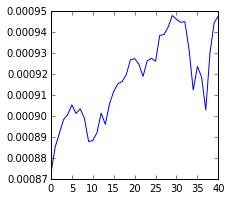

In [52]:
test_word = 'probably'
X = range(tf_2013_2016.shape[1])
plt.figure(figsize=(3,3))
plt.plot(X, tf_2013_2016.loc[test_word])
plt.show()

### Separate non-English and English growth words

In [57]:
english = [w.strip().lower() for w in open('../../data/frequency/english_words.txt', 'r')]
non_english_growth_words = set(growth_correls.index) - set(english)
print(len(non_english_growth_words))
print(' '.join(sorted(non_english_growth_words)))

6085
aa aaay aai aamc aamir aan aar aba abbysal abdl abend aber abh abi abilties abit abraxas absolut aby abysal acaba acabar acara acaso acca accel acces accs accu acess acestream acho acker acnologia acro actavis ada adaway adblockers adi adidas adren adresse adressed adressing aegean aeroplan af afab afaic afaik afcs afcw affordability afk afr afrin aftershock againts agaisnt aganist agb agender agg aggressiv aggro aggros aghs agi aginst agressively ags aguero ahah ahit ahk ahl ahmed ahnung ahould ahrar ahrefs ahrims ahsoka aia aida aight aimbot ain aina ainda aio aios aip airbnb airdodge airhorns airi airtime ais aiwb aka akebono aki akihabara akkad akkurat akl aknowledge ako aktion aktiv alaba alban alcatel aldri aldrig alejandro aleks aleppo alexa alg algs algum alguma alguns ali alibaba alie aliexpress alina alla alle alleen allein alleine allem allemaal allens allerdings allerede alles alli allomancy allt alltid alm alprazolam als alte alten alternativ alternativa altijd altoug

In [59]:
english_growth_words = set(growth_correls.index) & set(english)
print(len(english_growth_words))
print(' '.join(sorted(english_growth_words)))

3923
ab abandoning abilities abjuration absolute absolutely absurdly abt abundantly abusable abysmal abysmally abyssal accommodation accommodations account accounts accts accuracy ace aces achievable achieve acknowledged acolyte acolytes actionable activate activated activates activating activation activators active actively activeness actives actual acumen adapt adapting adaptive additional additions addressed adds adepts adjust adjusted adjuster adjusting adjustment adjustments advantage adventurers advices advisor advisors aerial aerials aesthetic aether affecting affidavit affinities affinity aft after afterburner afterimage against agenda aggressions aggressively agile agreement agreements ai aim aimer aiming airflow airing airmail alarming albania alchemical align aligned aligning aligns allied allies ally allying aloha alongside already alt alternate alternates altho ambitious ambushing amethyst amex ampoule ampoules ana analyse ancestral andromeda angler angles angling angular 

Non-proper non-English growth words:

[aaay abit accs acess acker adblockers adressed adressing af afaic afaik affordability afk againts agaisnt aganist agg aggro aggros aginst agressively ahah ahould aight airhorns airtime aka aknowledge alg algs altough alts analysing analytics anglosphere antagonise anthros anticheat antivaxxers apologism aproach arround arsed artefacts artifacting artifical artisanal artstyle asf asin aspirational asshurt asspull aswell atack atk atks atleast atm audiobook auth autist autists automod autopay autoplay avalaible avarage ayee ayeee ayy ayyy ayyye ayyyeee babywearing babyyy backend backlightbackline backlines backpedals backroom backstories backstory bae bandaid bants banwave barebones basebuilding baybay baybee baybeee bbeg bbegs bc bcos bcoz bcz beacuse beatmaps beatstick becasue becauae becsuse beeing beggining beginn behaviour belive belter belters benzo benzos bellends bestie bevause bhop bhopping biblethump bikepacking binged bingeing binging binning blackscreen blindsided blindy bm bms boardstate bodyblock bodyblocking bodyshot bodyshots boi boiii bois boiz bonnies boomin booped boops bootcamps bootloop bootloops borefest borked bots botted botting bougie bouta boutta boyyy boyz brahs braindead bralette bralettes breh broman brooo brrrt bruh bruhh bruhhh bruv btag bullshittery bumrush bunnyhop bussy buuut byeee callout callouts camgirl camgirls cancellable capitalise cartoonishly cashback cashgrab cashout catastrophizing catched catfishing catgirl catgirls cced ccing centralisation challange challanges challonge characterisation chatbot cheaping cherrypick cherrypicked cherrypicking childcare chokepoint chokepoints choosed choreo chosing chuckin chucklefucks chummer cig clickbait clueless clunkier clunkiness clunky clunkyness cmon codenames codependent cohost collab collabed collabs colonisation colonised colonisers colonising colourless comboed comboes comboing comms competive completable completionism completionist completionists completly coms conpletely consistenly consultancy consumables contactless continous continously controlly convo convos cooldown cooldowns couldve coz cozying crapshoot creds cringefest cringy crit criticals criticise criticised criticises criticising criting crits critting crossplay crowdfund crowdfunded crowdfunding cuck cuckhold culty curbstomped cus customisation cutted cuz dailys damge damit damm danks daps darkweb dashcam datamine datamined dataset datasets dbs deadset deadzone deadzones debloated debuff debuffed debuffing debuffs decarb decarbed decarbing decentish declutter decluttering defenitely deffo definetely definetly definitelly definitly defintely defo defs defusal defuser delisted demotivated densification deployable deployables depotted derank deranked desing desolder desoldered desoldering despawn despawning destabilising destabilized detransition dev devs dgaf dicked diference diferent differents dinked disrupters dissapointing dissappear diy diying dm dmed dmg dming dms doesnt dogshit dogwhistle doof doofus doomsayer doomsayers dooope doot dopeee doubleshot downpayment downplaying downscale doxed doxing dropdown droping droprate dumpstered dumpstering dweeb dweebs dysmorphia dysphoria dysphoric earther earthers easly echochamber ehhh emoji emojis endgame ennemies equipable equiped equiping equippable exacly exp eyy eyyy facepulls facetiming fairplay fanart fanarts fanbase fanbases fanboying fancam fancams fand fanfiction fangame fangames fanless fanmade fanservice fanservicey fav fave favourable favourably favourites favouritism fcing fck fcked fckin fcking fearmongering feefees femdom fest fests ffs finalised financials fireee firmware firmwares fk fkd fked fkin fking fkn flaired flairing flippy floof floofy fmil foh followups fomo foreal forreal forsure fragger fragmovie fragranced framedrops framerates freelancers frick fridged friendo frontend frustated frustating ftm fucc fuccboi fucj fuckboi fuckboy fuckery fuckkk fuckup fuckups fucky fulfilment fullscreen func funsies futureproof futureproofing fuuuck fuxk fwiw gamechanger gamemode gamemodes gameover gamified gamify gangbanged garanteed garunteed gaslighted gaslighting genderbent genderfluid generalist genocided genociding gentrified gentrify gentrifying glitched glute glutes gming godtier gon gonna gooo gotch gotcha gotchu gotta gottem grenaded griding grindable grindfest grindier grindy gtfoh guarenteed gud gurantee guranteed gungho gymming gynocentric hackusations hairloss hamfisted handwave handwaved hangry har hardcoded hardcoding hardpoints hardwire hasnt hateboner havent hax hbd headcannon headcanon headcanons headshot headshots headshotted headshotting headspace headsup hella hellscape highground highish hitbox hitboxes hmu honeslty honourable hoomans hoooly hotfix hotfixes hotswap houserules humblebrag humblebragging husbando iam idc ideea idek idfk idgaf idk iirc ijs ikr ima imao imigration immersive imo impactful imposible inarguably incentivise incentivised incentivize incentivized incentivizes inclusionary incosistent infantilization infantilize infantilizing influencers informations ingame inmediately inspo insta instakill instakilled instakilling instakills instalation interactable intergender irl ish isnt jabroni jabronies jabronis jackshit jank janky jfc jk jks journaling judgy jumpscare jumpscares kek killable killcount kinda kys labbing labtech lagfest laggier laggiest laggy lagless leaderboard leaderboards leaners lenght licenced lipsync literaly litt litterally litteraly litterly lmao lmaoo lmaooo lmfao lmfaoo lmfaooo lmk loadout loadouts localisation lolk lolll longform longsleeve longterm lookahead lool loool looot lov lowkey lvg lvled lvling lvls maaaybe mained maining maintenence mainz manbaby manchild manchildren manoeuvrability mantain matchfixing matchmade matchmake matchups maxed maximise maximising maxing mayyybe mcm meaningfull meatshield meatshields meeps megathread megathreads memed memeing mentionned mentorship merc merch mercs metas mfers microaggression microaggressions microagressions microdosing micromanaged micromanaging midseason midsize midtier mightve millenial millenials millennials miniboss minigame minimise minimising minmax minmaxed minmaxing misgendered misremember misremembered misremembering missable misterious modder modders modding modernisation modlist modmail modmic modteam moisturisers monetisation monologuing mook mookie mtfs muh multiattack multiclass multiclassed multiclassing multihit multirole murdery murked musst mutiple mysoginistic nah narative narratively nbd neato neckbeardy neet neets neonazi nerf nerfed nerfing neurotypical ngl niceguy nimby nimbyism nimbys noisey nolife nonbinary noot normalised normie normies nowdays npc npcs nuffin nuker nukers obv obvi obvs ofc officialy offlaner offlaners offscreen offseason og ogs okayish onboarding oneshot oneshots oneshotted oneshotting oof ooof opiod opioid opioids oponent oponents oportunity opress opressive optimised optimising optimizer optimizers org orgs otp otps outdamage outdamaged outdamages outskill outskilled overarching overbuff overbuffed overcomplicate overexaggerating overfitting overhype overhyping overkilling overnights overperform overperformed overperforming overrall overrepresented oversaturated oversharing overthink overthinking overthinks overthought paintjobs param params pathed pathing paygrade payscale paystubs paywalled paywalls payware peasy peoole perfomance photogrammetry pickable pickrate piggybacking placings platinumed plattform platz playerbase playerbases playlist playmaker playmaking playstyle playstyles playthrough playthroughs pleb pmd pmed podcast podcaster podcasters podcasting podcasts polarising poophole positionally positivity powerfull powerlifting powerplant powerup powerups ppl ppls prebuild prebuilt prebuilts preciate preety premade prepatch pretax preworkout prioritise prioritised prioritises prioritising prioritize prioritized prioritizes prioritizing proactively prob probabaly probleem probs procced proccing proccs proced procing procs progressivism promo propably protag protags publically pushback pushdowns pvm pvming pvp pvper quadcopters quippy quiting rabbithole ragdolled ragdolling raidable raidboss rando randos ransomware rapidfire realises rebalance rebalanced rebalances rebalancing rebook rebooting reboots rebrand rebuy rebuying recalibrate recalibrated recalibration reclassing recode recognising recommand recordkeeping recruitable redose redosed redosing redownloaded reflavor rehaul rehome rehoming reimagine reimagined reimagining rekt relatability relisten relistened relistening remaster remasters replug replugging repurpose repurposed reqs reseting reshoots reskin reskinned reskins respekt resurge retcon retconned retconning retweet retweeting retweets reup reupload reuploaded reuploading reuploads rewatchable rewatched rewatches rewatching rez ridicilous rippy rlly rly roadmap roadmaps rofl roided roleplay roleplayer romhacks rootable runtime runtimes rushdown saaame sameee sandboxed sapiosexual savescum savescumming scanlations scannable sceptical scoped scorelines screee screenshot screenshotted screenshotting screentime scripter scripters scrollwheel scrublord scummed sekrit selectable sended sensitives serialised shadowbanned shapeshift shapeshifting shitey shitfest shitfests shitlist shitpost shitposted shitposter shitposters shitposting shitposts shitshow shitshows shitstain shitstains shitstomp shitstomped shittalk shittalking shitter shitters shittest shittier shoehorning sitewide situationally sjw sjws skillers skillfull skillset skillsets skillups skincare skippable slayed sliiightly slowmo smackdown smalling smdh smfh smh smth smurfing snapchats snax snoozefest soloable someome someshit somethibg soundstage sourcing spacebars spam spaming spammed spamming spams speccy speedrun sperg sperging spergs spinned spitballing splunk spoilery spookiness spoonfed spoonfeed sportsball squishies stabilisation stabilised stackable stakeholders standalones stans statline startup startups statlines statted statwise steamroll steamrolled steamrolling steamrolls stemlord stemlords sth stickied stims stinkies storymode storywise strat strategical strategize strats strawmanning strengh strenght strenghts strengt strugle stucked stuttery submod suboptimal suboptimally subpar succ succes succesfully supercut superfan superfans superheavy superintelligence superweapon superweapons suplex suplexed suplexes suplexing supp supps suuuper swappable sweetspot sympathiser sympathisers synergise synergises synergize synergizes synergizing synth synthpop synths takeaway tankier tankiest tapings targetable tbf tbh teamate teamates teambuilding teamkill teamplay teched teching teleporting temping tfw thabks thematics theorised therfore theyd theyll theyre theyve thibk theorically thirding thiught thoigh thooo throughly throwables thst thx timeframe timeframes timeline timelines timeskip timespan timestamp timestamps timezone tix tldw tmw toons toptier townhall tracksuit trainwreck tranq trans transgender transgenderism transgenders transitioned transitioning transness transracial trappy traumatised treshold trialing tributed tributing trippier tropey tru trueee truu truuu truuue tryhard tryhards tryna trynna ubering ultrawide unactivated unban unbanned unbans unboosted unboxings uncharacteristically uncharismatic uncolonized underated undercosted underdosed underleveled underperform underperformance underperformed underperforming underperforms underwhelmed underwhelming undodgeable unequip unequipping unevolved unfavourable unfollow unfollowed unfollowing unfun uninstalled uninstaller uninstalling uninteractive uninvite unironic unironically unkillable unleveled unmemorable unmodded unnerfed unpunishable unranked unreleased unreliability unsurprising unsurprisingly unsynced untagged untimed untracked untradable untradeable unwinnable upcharge upfront uptick urself usecase usefull utilising vape vaping veeery vibe vibey vibing vid vids viewerbase viewership visualisation visualiser vloggers waaagh waifu waifus waitlist wallhack wallhacking wallhacks walljump wanna wartorn wayyy weaboo weaboos weakpoint weakpoints weakspot weap weaponised webinar webinars weeabo weeaboo weeaboos weeb werent werk wew wheelhouse whove winrate winrates winstreak wooorst workaround workarounds workflow workflows worksheet worldbuild worldbuilding wouldnt wouldve writeup wth wubba xan xp xps yday yee yeh yikes yknow yoloing yolos youd youll youre youtuber youtubers yt zoodles zzz ded devops dpsing esque evented eventer eventers ez ezpz faff fic fics fued fueds glowy heelish hitreg hitscan duders homelab hurtbox incl kext kexts keycap keycaps lastest lipo lipos lootz meleed mgtow missplay mmh mong mozzy nano nanos ootb posable powercreep prefire prefiring prev prizepools pugging reco scalling sharding shilly shippy shite shortlist shortlisted shotgunner shotgunners shotgunning shoting shouldnt shouldve shoutout shoutouts sightline sightlines simming sorcs standart standarts suss tdee tolly tyty urs woobie woth wothout decos joak pawg]

Non-proper English words:

[ab abt abusable accts ai alt altho app asap async autistic avg ay bb blobbing bloops bodying bullshits buyable cameo cameos cheeky cheesed chill combo combos comp comps coop crybabies crybaby cuckold cuckolded cuckolding cuckoldry cuckolds dang dank danker dankest dope dummy dupe duper dupes edgiest edgy esp farmable feeing feat feats flub flubbed fragged fragging frags fucked gaffes gaffs gappy garbo goobers goofs grind grinded grinding hr hrs huh hype hyped hypes hyping iconic info infos jobber jobbers jobbing lagger laggers lagging lifer loll loot mins missus moly murk narc narcs newish nobodies pally pct peaced peacing peeps perk perked perks perm pilled pinging prefab prefabs prep prepped prepping preps pro proc psychs quad quads qual randoms recs reg req rn rood saltier saltiest saltiness salty sandbagging savage schtick scrubby scumming scummy secs shadiness shady shilled shilling shipper shippers shipping shitted shitting shotted shotting shtick simp simps slog slogging slogs smut snappy snark snoot spawns spec spiking sticked streamer streamers sub subbing sups vip vips whaled whitewashed whitewashing wonky woolie woolly yeah zippy zowie autoing melees nae offs peaky pops quant swingy tanked teamed teaming tech temp tho tweet tweeted tweeting tweets twerps ultra uncapped uncapping]

In [93]:
growth_words_2013_2016_non_english = ['aaay', 'abit', 'accs', 'acess', 'acker', 'spinoffs', 'sync', 'xdd', 'xdddd', 'yall', 'yalls', 'welp', 'yaaas', 'yas', 'yass', 'yasss', 'adblockers', 'adressed', 'adressing', 'af', 'afaic', 'afaik', 'affordability', 'afk', 'againts', 'agaisnt', 'aganist', 'agg', 'aggro', 'aggros', 'aginst', 'agressively', 'ahah', 'ahould', 'aight', 'airhorns', 'airtime', 'aka', 'aknowledge', 'alg', 'algs', 'altough', 'alts', 'analysing', 'analytics', 'anglosphere', 'antagonise', 'anthros', 'anticheat', 'antivaxxers', 'apologism', 'aproach', 'arround', 'arsed', 'artefacts', 'artifacting', 'artifical', 'artisanal', 'artstyle', 'asf', 'asin', 'aspirational', 'asshurt', 'asspull', 'aswell', 'atack', 'atk', 'atks', 'atleast', 'atm', 'audiobook', 'auth', 'autist', 'autists', 'automod', 'autopay', 'autoplay', 'avalaible', 'avarage', 'ayee', 'ayeee', 'ayy', 'ayyy', 'ayyye', 'ayyyeee', 'babywearing', 'babyyy', 'backend', 'backlightbackline', 'backlines', 'backpedals', 'backroom', 'backstories', 'backstory', 'bae', 'bandaid', 'bants', 'banwave', 'barebones', 'basebuilding', 'baybay', 'baybee', 'baybeee', 'bbeg', 'bbegs', 'bc', 'bcos', 'bcoz', 'bcz', 'beacuse', 'beatmaps', 'beatstick', 'becasue', 'becauae', 'becsuse', 'beeing', 'beggining', 'beginn', 'behaviour', 'belive', 'belter', 'belters', 'benzo', 'benzos', 'bellends', 'bestie', 'bevause', 'bhop', 'bhopping', 'biblethump', 'bikepacking', 'binged', 'bingeing', 'binging', 'binning', 'blackscreen', 'blindsided', 'blindy', 'bm', 'bms', 'boardstate', 'bodyblock', 'bodyblocking', 'bodyshot', 'bodyshots', 'boi', 'boiii', 'bois', 'boiz', 'bonnies', 'boomin', 'booped', 'boops', 'bootcamps', 'bootloop', 'bootloops', 'borefest', 'borked', 'bots', 'botted', 'botting', 'bougie', 'bouta', 'boutta', 'boyyy', 'boyz', 'brahs', 'braindead', 'bralette', 'bralettes', 'breh', 'broman', 'brooo', 'brrrt', 'bruh', 'bruhh', 'bruhhh', 'bruv', 'btag', 'bullshittery', 'bumrush', 'bunnyhop', 'bussy', 'buuut', 'byeee', 'callout', 'callouts', 'camgirl', 'camgirls', 'cancellable', 'capitalise', 'cartoonishly', 'cashback', 'cashgrab', 'cashout', 'catastrophizing', 'catched', 'catfishing', 'catgirl', 'catgirls', 'cced', 'ccing', 'centralisation', 'challange', 'challanges', 'challonge', 'characterisation', 'chatbot', 'cheaping', 'cherrypick', 'cherrypicked', 'cherrypicking', 'childcare', 'chokepoint', 'chokepoints', 'choosed', 'choreo', 'chosing', 'chuckin', 'chucklefucks', 'chummer', 'cig', 'clickbait', 'clueless', 'clunkier', 'clunkiness', 'clunky', 'clunkyness', 'cmon', 'codenames', 'codependent', 'cohost', 'collab', 'collabed', 'collabs', 'colonisation', 'colonised', 'colonisers', 'colonising', 'colourless', 'comboed', 'comboes', 'comboing', 'comms', 'competive', 'completable', 'completionism', 'completionist', 'completionists', 'completly', 'coms', 'conpletely', 'consistenly', 'consultancy', 'consumables', 'contactless', 'continous', 'continously', 'controlly', 'convo', 'convos', 'cooldown', 'cooldowns', 'couldve', 'coz', 'cozying', 'crapshoot', 'creds', 'cringefest', 'cringy', 'crit', 'criticals', 'criticise', 'criticised', 'criticises', 'criticising', 'criting', 'crits', 'critting', 'crossplay', 'crowdfund', 'crowdfunded', 'crowdfunding', 'cuck', 'cuckhold', 'culty', 'curbstomped', 'cus', 'customisation', 'cutted', 'cuz', 'dailys', 'damge', 'damit', 'damm', 'danks', 'daps', 'darkweb', 'dashcam', 'datamine', 'datamined', 'dataset', 'datasets', 'dbs', 'deadset', 'deadzone', 'deadzones', 'debloated', 'debuff', 'debuffed', 'debuffing', 'debuffs', 'decarb', 'decarbed', 'decarbing', 'decentish', 'declutter', 'decluttering', 'defenitely', 'deffo', 'definetely', 'definetly', 'definitelly', 'definitly', 'defintely', 'defo', 'defs', 'defusal', 'defuser', 'delisted', 'demotivated', 'densification', 'deployable', 'deployables', 'depotted', 'derank', 'deranked', 'desing', 'desolder', 'desoldered', 'desoldering', 'despawn', 'despawning', 'destabilising', 'destabilized', 'detransition', 'dev', 'devs', 'dgaf', 'dicked', 'diference', 'diferent', 'differents', 'dinked', 'disrupters', 'dissapointing', 'dissappear', 'diy', 'diying', 'dm', 'dmed', 'dmg', 'dming', 'dms', 'doesnt', 'dogshit', 'dogwhistle', 'doof', 'doofus', 'doomsayer', 'doomsayers', 'dooope', 'doot', 'dopeee', 'doubleshot', 'downpayment', 'downplaying', 'downscale', 'doxed', 'doxing', 'dropdown', 'droping', 'droprate', 'dumpstered', 'dumpstering', 'dweeb', 'dweebs', 'dysmorphia', 'dysphoria', 'dysphoric', 'earther', 'earthers', 'easly', 'echochamber', 'ehhh', 'emoji', 'emojis', 'endgame', 'ennemies', 'equipable', 'equiped', 'equiping', 'equippable', 'exacly', 'exp', 'eyy', 'eyyy', 'facepulls', 'facetiming', 'fairplay', 'fanart', 'fanarts', 'fanbase', 'fanbases', 'fanboying', 'fancam', 'fancams', 'fand', 'fanfiction', 'fangame', 'fangames', 'fanless', 'fanmade', 'fanservice', 'fanservicey', 'fav', 'fave', 'favourable', 'favourably', 'favourites', 'favouritism', 'fcing', 'fck', 'fcked', 'fckin', 'fcking', 'fearmongering', 'feefees', 'femdom', 'fest', 'fests', 'ffs', 'finalised', 'financials', 'fireee', 'firmware', 'firmwares', 'fk', 'fkd', 'fked', 'fkin', 'fking', 'fkn', 'flaired', 'flairing', 'flippy', 'floof', 'floofy', 'fmil', 'foh', 'followups', 'fomo', 'foreal', 'forreal', 'forsure', 'fragger', 'fragmovie', 'fragranced', 'framedrops', 'framerates', 'freelancers', 'frick', 'fridged', 'friendo', 'frontend', 'frustated', 'frustating', 'ftm', 'fucc', 'fuccboi', 'fucj', 'fuckboi', 'fuckboy', 'fuckery', 'fuckkk', 'fuckup', 'fuckups', 'fucky', 'fulfilment', 'fullscreen', 'func', 'funsies', 'futureproof', 'futureproofing', 'fuuuck', 'fuxk', 'fwiw', 'gamechanger', 'gamemode', 'gamemodes', 'gameover', 'gamified', 'gamify', 'gangbanged', 'garanteed', 'garunteed', 'gaslighted', 'gaslighting', 'genderbent', 'genderfluid', 'generalist', 'genocided', 'genociding', 'gentrified', 'gentrify', 'gentrifying', 'glitched', 'glute', 'glutes', 'gming', 'godtier', 'gon', 'gonna', 'gooo', 'gotch', 'gotcha', 'gotchu', 'gotta', 'gottem', 'grenaded', 'griding', 'grindable', 'grindfest', 'grindier', 'grindy', 'gtfoh', 'guarenteed', 'gud', 'gurantee', 'guranteed', 'gungho', 'gymming', 'gynocentric', 'hackusations', 'hairloss', 'hamfisted', 'handwave', 'handwaved', 'hangry', 'har', 'hardcoded', 'hardcoding', 'hardpoints', 'hardwire', 'hasnt', 'hateboner', 'havent', 'hax', 'hbd', 'headcannon', 'headcanon', 'headcanons', 'headshot', 'headshots', 'headshotted', 'headshotting', 'headspace', 'headsup', 'hella', 'hellscape', 'highground', 'highish', 'hitbox', 'hitboxes', 'hmu', 'honeslty', 'honourable', 'hoomans', 'hoooly', 'hotfix', 'hotfixes', 'hotswap', 'houserules', 'humblebrag', 'humblebragging', 'husbando', 'iam', 'idc', 'ideea', 'idek', 'idfk', 'idgaf', 'idk', 'iirc', 'ijs', 'ikr', 'ima', 'imao', 'imigration', 'immersive', 'imo', 'impactful', 'imposible', 'inarguably', 'incentivise', 'incentivised', 'incentivize', 'incentivized', 'incentivizes', 'inclusionary', 'incosistent', 'infantilization', 'infantilize', 'infantilizing', 'influencers', 'informations', 'ingame', 'inmediately', 'inspo', 'insta', 'instakill', 'instakilled', 'instakilling', 'instakills', 'instalation', 'interactable', 'intergender', 'irl', 'ish', 'isnt', 'jabroni', 'jabronies', 'jabronis', 'jackshit', 'jank', 'janky', 'jfc', 'jk', 'jks', 'journaling', 'judgy', 'jumpscare', 'jumpscares', 'kek', 'killable', 'killcount', 'kinda', 'kys', 'labbing', 'labtech', 'lagfest', 'laggier', 'laggiest', 'laggy', 'lagless', 'leaderboard', 'leaderboards', 'leaners', 'lenght', 'licenced', 'lipsync', 'literaly', 'litt', 'litterally', 'litteraly', 'litterly', 'lmao', 'lmaoo', 'lmaooo', 'lmfao', 'lmfaoo', 'lmfaooo', 'lmk', 'loadout', 'loadouts', 'localisation', 'lolk', 'lolll', 'longform', 'longsleeve', 'longterm', 'lookahead', 'lool', 'loool', 'looot', 'lov', 'lowkey', 'lvg', 'lvled', 'lvling', 'lvls', 'maaaybe', 'mained', 'maining', 'maintenence', 'mainz', 'manbaby', 'manchild', 'manchildren', 'manoeuvrability', 'mantain', 'matchfixing', 'matchmade', 'matchmake', 'matchups', 'maxed', 'maximise', 'maximising', 'maxing', 'mayyybe', 'mcm', 'meaningfull', 'meatshield', 'meatshields', 'meeps', 'megathread', 'megathreads', 'memed', 'memeing', 'mentionned', 'mentorship', 'merc', 'merch', 'mercs', 'metas', 'mfers', 'microaggression', 'microaggressions', 'microagressions', 'microdosing', 'micromanaged', 'micromanaging', 'midseason', 'midsize', 'midtier', 'mightve', 'millenial', 'millenials', 'millennials', 'miniboss', 'minigame', 'minimise', 'minimising', 'minmax', 'minmaxed', 'minmaxing', 'misgendered', 'misremember', 'misremembered', 'misremembering', 'missable', 'misterious', 'modder', 'modders', 'modding', 'modernisation', 'modlist', 'modmail', 'modmic', 'modteam', 'moisturisers', 'monetisation', 'monologuing', 'mook', 'mookie', 'mtfs', 'muh', 'multiattack', 'multiclass', 'multiclassed', 'multiclassing', 'multihit', 'multirole', 'murdery', 'murked', 'musst', 'mutiple', 'mysoginistic', 'nah', 'narative', 'narratively', 'nbd', 'neato', 'neckbeardy', 'neet', 'neets', 'neonazi', 'nerf', 'nerfed', 'nerfing', 'neurotypical', 'ngl', 'niceguy', 'nimby', 'nimbyism', 'nimbys', 'noisey', 'nolife', 'nonbinary', 'noot', 'normalised', 'normie', 'normies', 'nowdays', 'npc', 'npcs', 'nuffin', 'nuker', 'nukers', 'obv', 'obvi', 'obvs', 'ofc', 'officialy', 'offlaner', 'offlaners', 'offscreen', 'offseason', 'og', 'ogs', 'okayish', 'onboarding', 'oneshot', 'oneshots', 'oneshotted', 'oneshotting', 'oof', 'ooof', 'opiod', 'opioid', 'opioids', 'oponent', 'oponents', 'oportunity', 'opress', 'opressive', 'optimised', 'optimising', 'optimizer', 'optimizers', 'org', 'orgs', 'otp', 'otps', 'outdamage', 'outdamaged', 'outdamages', 'outskill', 'outskilled', 'overarching', 'overbuff', 'overbuffed', 'overcomplicate', 'overexaggerating', 'overfitting', 'overhype', 'overhyping', 'overkilling', 'overnights', 'overperform', 'overperformed', 'overperforming', 'overrall', 'overrepresented', 'oversaturated', 'oversharing', 'overthink', 'overthinking', 'overthinks', 'overthought', 'paintjobs', 'param', 'params', 'pathed', 'pathing', 'paygrade', 'payscale', 'paystubs', 'paywalled', 'paywalls', 'payware', 'peasy', 'peoole', 'perfomance', 'photogrammetry', 'pickable', 'pickrate', 'piggybacking', 'placings', 'platinumed', 'plattform', 'platz', 'playerbase', 'playerbases', 'playlist', 'playmaker', 'playmaking', 'playstyle', 'playstyles', 'playthrough', 'playthroughs', 'pleb', 'pmd', 'pmed', 'podcast', 'podcaster', 'podcasters', 'podcasting', 'podcasts', 'polarising', 'poophole', 'positionally', 'positivity', 'powerfull', 'powerlifting', 'powerplant', 'powerup', 'powerups', 'ppl', 'ppls', 'prebuild', 'prebuilt', 'prebuilts', 'preciate', 'preety', 'premade', 'prepatch', 'pretax', 'preworkout', 'prioritise', 'prioritised', 'prioritises', 'prioritising', 'prioritize', 'prioritized', 'prioritizes', 'prioritizing', 'proactively', 'prob', 'probabaly', 'probleem', 'probs', 'procced', 'proccing', 'proccs', 'proced', 'procing', 'procs', 'progressivism', 'promo', 'propably', 'protag', 'protags', 'publically', 'pushback', 'pushdowns', 'pvm', 'pvming', 'pvp', 'pvper', 'quadcopters', 'quippy', 'quiting', 'rabbithole', 'ragdolled', 'ragdolling', 'raidable', 'raidboss', 'rando', 'randos', 'ransomware', 'rapidfire', 'realises', 'rebalance', 'rebalanced', 'rebalances', 'rebalancing', 'rebook', 'rebooting', 'reboots', 'rebrand', 'rebuy', 'rebuying', 'recalibrate', 'recalibrated', 'recalibration', 'reclassing', 'recode', 'recognising', 'recommand', 'recordkeeping', 'recruitable', 'redose', 'redosed', 'redosing', 'redownloaded', 'reflavor', 'rehaul', 'rehome', 'rehoming', 'reimagine', 'reimagined', 'reimagining', 'rekt', 'relatability', 'relisten', 'relistened', 'relistening', 'remaster', 'remasters', 'replug', 'replugging', 'repurpose', 'repurposed', 'reqs', 'reseting', 'reshoots', 'reskin', 'reskinned', 'reskins', 'respekt', 'resurge', 'retcon', 'retconned', 'retconning', 'retweet', 'retweeting', 'retweets', 'reup', 'reupload', 'reuploaded', 'reuploading', 'reuploads', 'rewatchable', 'rewatched', 'rewatches', 'rewatching', 'rez', 'ridicilous', 'rippy', 'rlly', 'rly', 'roadmap', 'roadmaps', 'rofl', 'roided', 'roleplay', 'roleplayer', 'romhacks', 'rootable', 'runtime', 'runtimes', 'rushdown', 'saaame', 'sameee', 'sandboxed', 'sapiosexual', 'savescum', 'savescumming', 'scanlations', 'scannable', 'sceptical', 'scoped', 'scorelines', 'screee', 'screenshot', 'screenshotted', 'screenshotting', 'screentime', 'scripter', 'scripters', 'scrollwheel', 'scrublord', 'scummed', 'sekrit', 'selectable', 'sended', 'sensitives', 'serialised', 'shadowbanned', 'shapeshift', 'shapeshifting', 'shitey', 'shitfest', 'shitfests', 'shitlist', 'shitpost', 'shitposted', 'shitposter', 'shitposters', 'shitposting', 'shitposts', 'shitshow', 'shitshows', 'shitstain', 'shitstains', 'shitstomp', 'shitstomped', 'shittalk', 'shittalking', 'shitter', 'shitters', 'shittest', 'shittier', 'shoehorning', 'sitewide', 'situationally', 'sjw', 'sjws', 'skillers', 'skillfull', 'skillset', 'skillsets', 'skillups', 'skincare', 'skippable', 'slayed', 'sliiightly', 'slowmo', 'smackdown', 'smalling', 'smdh', 'smfh', 'smh', 'smth', 'smurfing', 'snapchats', 'snax', 'snoozefest', 'soloable', 'someome', 'someshit', 'somethibg', 'soundstage', 'sourcing', 'spacebars', 'spam', 'spaming', 'spammed', 'spamming', 'spams', 'speccy', 'speedrun', 'sperg', 'sperging', 'spergs', 'spinned', 'spitballing', 'splunk', 'spoilery', 'spookiness', 'spoonfed', 'spoonfeed', 'sportsball', 'squishies', 'stabilisation', 'stabilised', 'stackable', 'stakeholders', 'standalones', 'stans', 'statline', 'startup', 'startups', 'statlines', 'statted', 'statwise', 'steamroll', 'steamrolled', 'steamrolling', 'steamrolls', 'stemlord', 'stemlords', 'sth', 'stickied', 'stims', 'stinkies', 'storymode', 'storywise', 'strat', 'strategical', 'strategize', 'strats', 'strawmanning', 'strengh', 'strenght', 'strenghts', 'strengt', 'strugle', 'stucked', 'stuttery', 'submod', 'suboptimal', 'suboptimally', 'subpar', 'succ', 'succes', 'succesfully', 'supercut', 'superfan', 'superfans', 'superheavy', 'superintelligence', 'superweapon', 'superweapons', 'suplex', 'suplexed', 'suplexes', 'suplexing', 'supp', 'supps', 'suuuper', 'swappable', 'sweetspot', 'sympathiser', 'sympathisers', 'synergise', 'synergises', 'synergize', 'synergizes', 'synergizing', 'synth', 'synthpop', 'synths', 'takeaway', 'tankier', 'tankiest', 'tapings', 'targetable', 'tbf', 'tbh', 'teamate', 'teamates', 'teambuilding', 'teamkill', 'teamplay', 'teched', 'teching', 'teleporting', 'temping', 'tfw', 'thabks', 'thematics', 'theorised', 'therfore', 'theyd', 'theyll', 'theyre', 'theyve', 'thibk', 'theorically', 'thirding', 'thiught', 'thoigh', 'thooo', 'throughly', 'throwables', 'thst', 'thx', 'timeframe', 'timeframes', 'timeline', 'timelines', 'timeskip', 'timespan', 'timestamp', 'timestamps', 'timezone', 'tix', 'tldw', 'tmw', 'toons', 'toptier', 'townhall', 'tracksuit', 'trainwreck', 'tranq', 'trans', 'transgender', 'transgenderism', 'transgenders', 'transitioned', 'transitioning', 'transness', 'transracial', 'trappy', 'traumatised', 'treshold', 'trialing', 'tributed', 'tributing', 'trippier', 'tropey', 'tru', 'trueee', 'truu', 'truuu', 'truuue', 'tryhard', 'tryhards', 'tryna', 'trynna', 'ubering', 'ultrawide', 'unactivated', 'unban', 'unbanned', 'unbans', 'unboosted', 'unboxings', 'uncharacteristically', 'uncharismatic', 'uncolonized', 'underated', 'undercosted', 'underdosed', 'underleveled', 'underperform', 'underperformance', 'underperformed', 'underperforming', 'underperforms', 'underwhelmed', 'underwhelming', 'undodgeable', 'unequip', 'unequipping', 'unevolved', 'unfavourable', 'unfollow', 'unfollowed', 'unfollowing', 'unfun', 'uninstalled', 'uninstaller', 'uninstalling', 'uninteractive', 'uninvite', 'unironic', 'unironically', 'unkillable', 'unleveled', 'unmemorable', 'unmodded', 'unnerfed', 'unpunishable', 'unranked', 'unreleased', 'unreliability', 'unsurprising', 'unsurprisingly', 'unsynced', 'untagged', 'untimed', 'untracked', 'untradable', 'untradeable', 'unwinnable', 'upcharge', 'upfront', 'uptick', 'urself', 'usecase', 'usefull', 'utilising', 'vape', 'vaping', 'veeery', 'vibe', 'vibey', 'vibing', 'vid', 'vids', 'viewerbase', 'viewership', 'visualisation', 'visualiser', 'vloggers', 'waaagh', 'waifu', 'waifus', 'waitlist', 'wallhack', 'wallhacking', 'wallhacks', 'walljump', 'wanna', 'wartorn', 'wayyy', 'weaboo', 'weaboos', 'weakpoint', 'weakpoints', 'weakspot', 'weap', 'weaponised', 'webinar', 'webinars', 'weeabo', 'weeaboo', 'weeaboos', 'weeb', 'werent', 'werk', 'wew', 'wheelhouse', 'whove', 'winrate', 'winrates', 'winstreak', 'wooorst', 'workaround', 'workarounds', 'workflow', 'workflows', 'worksheet', 'worldbuild', 'worldbuilding', 'wouldnt', 'wouldve', 'writeup', 'wth', 'wubba', 'xan', 'xp', 'xps', 'yday', 'yee', 'yeh', 'yikes', 'yknow', 'yoloing', 'yolos', 'youd', 'youll', 'youre', 'youtuber', 'youtubers', 'yt', 'zoodles', 'zzz', 'ded', 'devops', 'dpsing', 'esque', 'evented', 'eventer', 'eventers', 'ez', 'ezpz', 'faff', 'fic', 'fics', 'fued', 'fueds', 'glowy', 'heelish', 'hitreg', 'hitscan', 'duders', 'homelab', 'hurtbox', 'incl', 'kext', 'kexts', 'keycap', 'keycaps', 'lastest', 'lipo', 'lipos', 'lootz', 'meleed', 'mgtow', 'missplay', 'mmh', 'mong', 'mozzy', 'nano', 'nanos', 'ootb', 'posable', 'powercreep', 'prefire', 'prefiring', 'prev', 'prizepools', 'pugging', 'reco', 'scalling', 'sharding', 'shilly', 'shippy', 'shite', 'shortlist', 'shortlisted', 'shotgunner', 'shotgunners', 'shotgunning', 'shoting', 'shouldnt', 'shouldve', 'shoutout', 'shoutouts', 'sightline', 'sightlines', 'simming', 'sorcs', 'standart', 'standarts', 'suss', 'tdee', 'tolly', 'tyty', 'urs', 'woobie', 'woth', 'wothout', 'decos', 'joak', 'pawg']
print(len(growth_words_2013_2016_non_english))
growth_words_2013_2016_english = ['ab', 'abt', 'abusable', 'accts', 'ai', 'alt', 'altho', 'shakeup', 'slay', 'slays', 'app', 'asap', 'async', 'autistic', 'avg', 'ay', 'bb', 'blobbing', 'bloops', 'bodying', 'bullshits', 'buyable', 'cameo', 'cameos', 'cheeky', 'cheesed', 'chill', 'combo', 'combos', 'comp', 'comps', 'coop', 'crybabies', 'crybaby', 'cuckold', 'cuckolded', 'cuckolding', 'cuckoldry', 'cuckolds', 'dang', 'dank', 'danker', 'dankest', 'dope', 'dummy', 'dupe', 'duper', 'dupes', 'edgiest', 'edgy', 'esp', 'farmable', 'feeing', 'feat', 'feats', 'flub', 'flubbed', 'fragged', 'fragging', 'frags', 'fucked', 'gaffes', 'gaffs', 'gappy', 'garbo', 'goobers', 'goofs', 'grind', 'grinded', 'grinding', 'hr', 'hrs', 'huh', 'hype', 'hyped', 'hypes', 'hyping', 'iconic', 'info', 'infos', 'jobber', 'jobbers', 'jobbing', 'lagger', 'laggers', 'lagging', 'lifer', 'loll', 'loot', 'mins', 'missus', 'moly', 'murk', 'narc', 'narcs', 'newish', 'nobodies', 'pally', 'pct', 'peaced', 'peacing', 'peeps', 'perk', 'perked', 'perks', 'perm', 'pilled', 'pinging', 'prefab', 'prefabs', 'prep', 'prepped', 'prepping', 'preps', 'pro', 'proc', 'psychs', 'quad', 'quads', 'qual', 'randoms', 'recs', 'reg', 'req', 'rn', 'rood', 'saltier', 'saltiest', 'saltiness', 'salty', 'sandbagging', 'savage', 'schtick', 'scrubby', 'scumming', 'scummy', 'secs', 'shadiness', 'shady', 'shilled', 'shilling', 'shipper', 'shippers', 'shipping', 'shitted', 'shitting', 'shotted', 'shotting', 'shtick', 'simp', 'simps', 'slog', 'slogging', 'slogs', 'smut', 'snappy', 'snark', 'snoot', 'spawns', 'spec', 'spiking', 'sticked', 'streamer', 'streamers', 'sub', 'subbing', 'sups', 'vip', 'vips', 'whaled', 'whitewashed', 'whitewashing', 'wonky', 'woolie', 'woolly', 'yeah', 'zippy', 'zowie', 'autoing', 'melees', 'nae', 'offs', 'peaky', 'pops', 'quant', 'swingy', 'tanked', 'teamed', 'teaming', 'tech', 'temp', 'tho', 'tweet', 'tweeted', 'tweeting', 'tweets', 'twerps', 'ultra', 'uncapped', 'uncapping']
print(len(growth_words_2013_2016_english))

1518
197


Write to file.

In [94]:
growth_words_2013_2016 = growth_words_2013_2016_non_english + growth_words_2013_2016_english
growth_words_2013_2016_df = pd.DataFrame({'categories' : ['misc'], 'words' : ['/'.join(sorted(growth_words_2013_2016))]})
out_fname = '../../data/frequency/growth_words/2013_2016_growth_words_clean.csv'
growth_words_2013_2016_df.to_csv(out_fname, index=False)

Update banned growth words.

In [95]:
banned_growth_words_2013_2016 = set(growth_correls.index) - set(growth_words_2013_2016)
print(len(banned_growth_words_2013_2016))
print(' '.join(sorted(banned_growth_words_2013_2016)))
banned_growth_words_2013_2016_df = pd.DataFrame({'categories' : ['misc'], 'words' : ['/'.join(sorted(banned_growth_words_2013_2016))]})
out_fname = '../../data/frequency/growth_words/2013_2016_growth_words_banned.csv'
banned_growth_words_2013_2016_df.to_csv(out_fname, index=False)

8294
aa aai aamc aamir aan aar aba abandoning abbysal abdl abend aber abh abi abilities abilties abjuration abraxas absolut absolute absolutely absurdly abundantly aby abysal abysmal abysmally abyssal acaba acabar acara acaso acca accel acces accommodation accommodations account accounts accu accuracy ace aces acestream achievable achieve acho acknowledged acnologia acolyte acolytes acro actavis actionable activate activated activates activating activation activators active actively activeness actives actual acumen ada adapt adapting adaptive adaway additional additions addressed adds adepts adi adidas adjust adjusted adjuster adjusting adjustment adjustments adren adresse advantage adventurers advices advisor advisors aegean aerial aerials aeroplan aesthetic aether afab afcs afcw affecting affidavit affinities affinity afr afrin aft after afterburner afterimage aftershock against agb agenda agender aggressions aggressiv aggressively aghs agi agile agreement agreements ags aguero ahit 

## Test neighbor correlations
Test correlations between 2013-2016 growth words and nearest neighbors.

In [ ]:
neighbors = pd.read_csv('../../data/embeddings/2015-06_wang2vec_100_5_nearest_neighbors.tsv', sep='\t', index_col=0)


## Test embeddings
We computed structured skip-gram embeddings for 2013-06 data, so let's test them!

In [66]:
from gensim.models import Word2Vec
struc_sim_embeddings = Word2Vec.load_word2vec_format('../../data/embeddings/2013-06_wang2vec_100_5_embeddings', binary=True)

In [86]:
test_words = ['af', 'cuck', 'doggo', 'ghosting',' cringy', 'tbh', 'shitpost', 'salty', 'ikr', 'ffs', 'weirdly']
top_k = 10
for w in test_words:
    try:
        neighbor_sim_pairs = struc_sim_embeddings.most_similar(w, topn=top_k)
        print('%s = %s'%(w, str(neighbor_sim_pairs)))
    except Exception, e:
        pass

af = [(u'av', 0.676023542881012), (u'og', 0.6759570837020874), (u'med', 0.6679155230522156), (u'cine', 0.6672478914260864), (u'er', 0.6585938930511475), (u'slike', 0.6508078575134277), (u'jag', 0.6505913138389587), (u'fantastisk', 0.6487926244735718), (u'mot', 0.6484740972518921), (u'sett', 0.6475484371185303)]
cuck = [(u'mmf', 0.8477411270141602), (u'fluttery', 0.8412511348724365), (u'straightbro', 0.8278779983520508), (u'furbaby', 0.8277243971824646), (u'cringetastic', 0.8260094523429871), (u'kinkier', 0.8249675035476685), (u'tgirls', 0.8247045278549194), (u'horney', 0.8245331645011902), (u'friendzones', 0.8218320608139038), (u'heartbreaks', 0.8178691864013672)]
ghosting = [(u'artifacting', 0.8036106824874878), (u'aliasing', 0.7626581788063049), (u'pentile', 0.7412667274475098), (u'choppiness', 0.7365777492523193), (u'capacitive', 0.7345528602600098), (u'multitouch', 0.7299104332923889), (u'antialiasing', 0.7262823581695557), (u'lagg', 0.7227715849876404), (u'whiteline', 0.7214338779

In [71]:
test_words = ['ghosting', 'doggo']
print(correls_2013_2016.loc[test_words])

            correl        pvalue
ghosting  0.703136  2.955051e-07
doggo    -0.506620  7.250149e-04


That's weird. I'm pretty sure that `doggo` was a new word in 2015-2016.

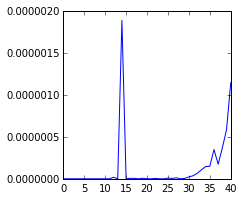

In [79]:
test_word = 'doggo'
X = range(tf_2013_2016_norm.shape[1])
plt.figure(figsize=(3,3))
plt.plot(X, tf_2013_2016_norm.loc[test_word])
plt.show()

I guess that weird spike around mid-2014 can throw off Spearman's correlation.

In [96]:
growth_words_2013_2016_valid = set(growth_words_2013_2016) & set(struc_sim_embeddings.vocab.keys())
print(len(growth_words_2013_2016_valid))

1323


## Ratio test
What if we define "growth" as the ratio between final frequency sum and initial frequency sum?

$$G = \{w \in V s.t. \frac{\sum f_{w, N-k:k}}{\sum f_{w, 0:k}}\}$$

In [21]:
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import sys
if('..' not in sys.path):
    sys.path.append('..')
from data_processing.data_handler import get_default_vocab, smooth_stats

In [22]:
tf = pd.read_csv('../../data/frequency/2013_2016_tf_norm.tsv', sep='\t', index_col=0)
vocab = get_default_vocab()
tf = pd.np.log10(smooth_stats(tf.loc[vocab, :].fillna(0, inplace=False)))

In [24]:
N = tf.shape[1]
k = N / 2
tf_ratio = tf.iloc[:, -k:].mean(axis=1) - tf.iloc[:, :k].mean(axis=1)
tf_ratio.sort_values(inplace=True, ascending=False)

In [25]:
S = 500
pd.set_option('display.max_rows', S)
print(tf_ratio)

chasun                                3.319013
fnaf                                  3.230496
amiibo                                3.168273
subtank                               3.111412
sotfs                                 3.091186
zulrah                                3.089725
kalista                               2.988152
sumail                                2.967650
kylo                                  2.953883
funhaus                               2.946218
cinderhulk                            2.939989
veromos                               2.929093
heavensward                           2.925913
reignover                             2.923616
cosrx                                 2.915173
reksai                                2.912267
hololens                              2.909814
nekroz                                2.875742
lkali                                 2.873741
omnigul                               2.861647
fatebringer                           2.861559
tasigur      

In [28]:
tf_ratio_lower = 1.
print(len(tf_ratio[tf_ratio >= tf_ratio_lower]))
print(tf_ratio[tf_ratio >= tf_ratio_lower])

1565
chasun              3.319013
fnaf                3.230496
amiibo              3.168273
subtank             3.111412
sotfs               3.091186
zulrah              3.089725
kalista             2.988152
sumail              2.967650
kylo                2.953883
funhaus             2.946218
cinderhulk          2.939989
veromos             2.929093
heavensward         2.925913
reignover           2.923616
cosrx               2.915173
reksai              2.912267
hololens            2.909814
nekroz              2.875742
lkali               2.873741
omnigul             2.861647
fatebringer         2.861559
tasigur             2.861360
fredbear            2.797873
dbha                2.795273
crota               2.791903
deflategate         2.791500
hadaron             2.781472
lushen              2.760108
gamergate           2.755509
opskins             2.735498
gjally              2.702982
acasis              2.682595
atarka              2.681021
zaiross             2.667944
azir     

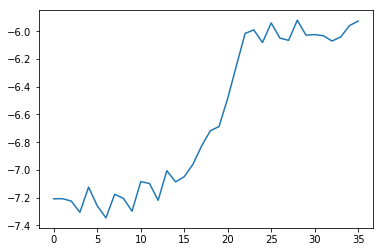

In [49]:
test_word = 'normies'
X = pd.np.arange(N)
plt.plot(X, tf.loc[test_word])
# plt.yscale('log')
plt.show()

What if we put a lower and upper limit on growth? That way we wouldn't just get words that blew up because of topical shift.

In [29]:
percentiles = [50, 60, 70, 80, 90, 95]
for pct in percentiles:
    pct_val = pd.np.percentile(tf_ratio, pct)
    print('%.3f%% = %.3f'%(pct, pct_val))

50.000% = 0.002
60.000% = 0.024
70.000% = 0.054
80.000% = 0.106
90.000% = 0.239
95.000% = 0.445


In [37]:
tf_ratio_lower_pct = 95
tf_ratio_lower_pct_val = pd.np.percentile(tf_ratio, tf_ratio_lower_pct)
tf_ratio_growth_words = tf_ratio[tf_ratio >= tf_ratio_lower_pct_val]
print(len(tf_ratio_growth_words))
print(tf_ratio_growth_words)

5000
chasun              3.319013
fnaf                3.230496
amiibo              3.168273
subtank             3.111412
sotfs               3.091186
zulrah              3.089725
kalista             2.988152
sumail              2.967650
kylo                2.953883
funhaus             2.946218
cinderhulk          2.939989
veromos             2.929093
heavensward         2.925913
reignover           2.923616
cosrx               2.915173
reksai              2.912267
hololens            2.909814
nekroz              2.875742
lkali               2.873741
omnigul             2.861647
fatebringer         2.861559
tasigur             2.861360
fredbear            2.797873
dbha                2.795273
crota               2.791903
deflategate         2.791500
hadaron             2.781472
lushen              2.760108
gamergate           2.755509
opskins             2.735498
gjally              2.702982
acasis              2.682595
atarka              2.681021
zaiross             2.667944
azir     

In [36]:
# remove the proper nouns
tag_estimates = pd.read_csv('../../data/frequency/2013_2016_tag_pcts.tsv', sep='\t', index_col=0).apply(lambda x: x.argmax(), axis=1)
proper_nouns = tag_estimates[tag_estimates == '^'].index.tolist()
print(len(proper_nouns))

27715


In [38]:
print(len(set(tf_ratio_growth_words.index) - set(proper_nouns)))

2386


In [42]:
growth_words_known = pd.read_csv('../../data/frequency/word_lists/2013_2016_growth_words_clean.csv', index_col=None)['word'].tolist()

In [43]:
growth_words_non_proper = list(set(tf_ratio_growth_words.index) - set(proper_nouns) - set(growth_words_known))
print(','.join(sorted(growth_words_non_proper)))

aaayyy,aadvantage,aard,abathur,abbrev,aber,acestream,achlyophage,acnologia,adani,adepts,adlet,adolin,adren,adulting,aerials,aerith,aerospray,afab,afrin,afterbirth,agario,ahnung,ahq,aimers,aio,airdodge,airdrops,aizy,akame,akantor,akechi,akeno,ako,aktiv,alie,aliexpress,allanon,alle,allein,alleine,allem,allerdings,alles,alm,almir,alonne,alphabay,alphago,alysanne,alyut,amab,amai,amaz,amethyst,amiibo,amiibro,amiibros,ampoule,anacondas,anad,anael,anavel,animatronic,animatronics,anml,anschauen,ansonsten,antigg,antis,antminer,antonidas,anub,anyfin,aolong,aotc,aotd,aou,apds,aphe,applepay,arbalest,arbutin,archwing,ardm,ardor,argaiv,arrowverse,artour,asajj,ascendancy,ascensions,asds,aspected,aspirant,asriel,ast,astero,astromech,atgms,atman,atro,auch,auchenai,audiobookstore,auf,augur,aurax,aurelion,aurey,auric,aussage,austwins,autorifle,awakens,awalt,awoken,awper,awpers,awping,awps,awr,axii,ayew,ayylmao,azael,azer,azir,azk,azmo,baalke,babadook,babymetal,babyrage,badlapur,baity,bakugou,ballerhorn,b

In [ ]:
growth_words_non_proper_clean = ['aard', 'abbrev', 'adulting', 'asf', 'aspected', 'asspull', 
                                 'ayylmao', 'ayyy', 'baity', 'bants', 'bantz', 'banwave', 'basebitch',
                                 'bhopping', 'birb', 'blep', 'blop', 'bois', 'boiz', 'boomin',
                                 'bruhhh', 'btfo', 'brutalities', 'clickbait', 'clickbaiting', 'clickbaity',
                                 'collat', 'comingsoon', 'commlink', 'conq', 'coptering', 
                                 'cuck', 'cucked', 'cucking', 'cucks', 'cybersecurity',
                                 'dank', 'danker', 'dankest', 'dankness', 'derank', 'deranked',
                                 'derankers', 'deranking', 'destashing', 'doxing', 'doggo', 'donezo', 'doot', 
                                 'dops', 'edgelord', 'edgelords', 'eem', 'eyy', 'facebank', 'facebanking',
                                 'fam', 'fangame', 'fangames', 'feefees', 'feelsbadman', 'fleek', 'flowey',
                                 'fuckboys', 'gild', 'gilds', 'hypeee', 'leakin', 'lifecoach', 'loons',
                                 'loosies', 'manspreading', 'memer', 'memers', 'meming', 'microdose', 
                                 'millennial', 'mombie', 'mombies', 'ndad', 'nexting', 'nfamily', 
                                 'noty', 'nudetorial', 'obeast', 'oml', 'pupper', 'pussypass', 'qotd', 
                                 'ragrets', 'reachability', 'redeposit', 'redeposited', 'reee', 
                                 'regild', 'regrab', 'reking', 'rekted', 'rekts', 'roastees', 
                                 'schwifty', 'seemsgood', 'senpai', 'sexpats', 'shitlording', 'shotcall',
                                 'shotcalling', 'showerthought', 'snek', 'softbanned', 'spoopy', 
                                 'strawpoll', 'tankies', 'tfyc', 'tendies', 'tifu', 'tumblrina', 
                                 'updoot', 'verysmart', 'viewbot', 'viewbots', 'viewbotting', 
                                 'weebs', 'wutface', 'yaaasss']

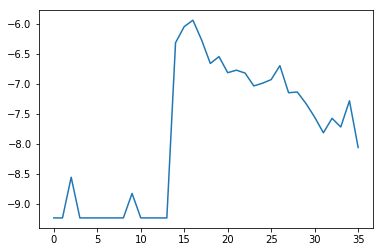

In [52]:
test_word = 'tfyc'
X = pd.np.arange(N)
plt.plot(X, tf.loc[test_word])
plt.show()

Uh oh! Even words with a high growth ratio might actually be decline words. How do we weed these out apart from just looking??